In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# undersampling 된 검사결과 데이터만 분석

In [ ]:
path = "/content/drive/Shareddrives/Multicampus/Preprocessing/"

In [ ]:
pivot12 = pd.read_csv(path+"pivot12_mnmx_under_ind.csv")

In [ ]:
df_clean = pd.read_csv(path+"dummy_clean.csv")

In [ ]:
df_clean.head()

SUBJECT_ID       stay  ...  AGEG2_senior  AGEG2_young_adult
0          30   5.013889  ...             1                  0
1          31   7.647917  ...             1                  0
2          32  19.197917  ...             0                  0
3          41  27.218750  ...             1                  0
4         364   7.795139  ...             1                  0

[5 rows x 65 columns]

In [ ]:
df_clean[['SUBJECT_ID','stay']]

SUBJECT_ID       stay
0             30   5.013889
1             31   7.647917
2             32  19.197917
3             41  27.218750
4            364   7.795139
...          ...        ...
8901       98753  19.440278
8902       98762   6.676389
8903       98768   1.940972
8904       98794   4.145833
8905       98797   0.662500

[8906 rows x 2 columns]

In [ ]:
df_pivot = pd.merge(df_clean[['SUBJECT_ID','stay']], pivot12,
                    on="SUBJECT_ID",
                    how='inner')

In [ ]:
df_pivot.head()

SUBJECT_ID       stay  50820_min  ...  51275_max_i  51279_max_i  51301_max_i
0          30   5.013889       7.33  ...            0            0            0
1          31   7.647917       7.47  ...            1            1            1
2          32  19.197917       7.34  ...            0            0            0
3          41  27.218750       7.44  ...            1            1            1
4         364   7.795139       7.35  ...            0            0            0

[5 rows x 86 columns]

In [ ]:
from sklearn.impute import SimpleImputer
def mean_z(data, target, strategy='mean'):
    content = data.drop(['SUBJECT_ID','stay'],axis=1)

    imputer = SimpleImputer(strategy=strategy)
    imputed = imputer.fit_transform(content)
    df_imputed = pd.DataFrame(imputed, columns=content.columns)

In [ ]:
def mean_z(data, target, strategy='mean'):
    content = data.drop(['SUBJECT_ID','stay'],axis=1)

    imputer = SimpleImputer(strategy=strategy)
    imputed = imputer.fit_transform(content)
    df_imputed = pd.DataFrame(imputed, columns=content.columns)
        
    X = df_imputed
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 표준화
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)

    return X_train, X_test, y_train, y_test

In [ ]:
len(df_pivot['SUBJECT_ID'])

8906

In [ ]:
mean_z_ind = mean_z(df_pivot, 'stay')
X_train, X_test, y_train, y_test = mean_z_ind

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

7124
1782


In [ ]:
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0),
          SVR(),
          DecisionTreeRegressor()]

results_r2 = {}
results_MAE = {}
results_RMSE = {}

for model in models:
    
    # 모델 정의 및 모델 형성
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # 예측
    y_pred = reg_model.predict(X_test)
    
    # 모델 이름
    name = str(model).split("(")[0]

    results_r2[name] = r2_score(y_test, y_pred)
    results_MAE[name] = metrics.mean_absolute_error(y_test, y_pred)
    results_RMSE[name] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('{} done.'.format(name))

SGDRegressor done.
GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.
DecisionTreeRegressor done.


In [ ]:
results_r2

{'DecisionTreeRegressor': -0.8147431337404201,
 'GradientBoostingRegressor': 0.03574462749623786,
 'KNeighborsRegressor': -0.06363371126791617,
 'LinearRegression': 0.025646512557981893,
 'RandomForestRegressor': 0.031247327771473876,
 'SGDRegressor': 0.02293707247581611,
 'SVR': -0.048703509530160005}

In [ ]:
results_MAE

{'DecisionTreeRegressor': 9.594486484665884,
 'GradientBoostingRegressor': 6.860158317407513,
 'KNeighborsRegressor': 7.234430259383963,
 'LinearRegression': 6.862501379493364,
 'RandomForestRegressor': 7.120047318525896,
 'SGDRegressor': 6.9047458322642905,
 'SVR': 6.226318682880243}

In [ ]:
results_RMSE

{'DecisionTreeRegressor': 16.452456929597016,
 'GradientBoostingRegressor': 11.992762005197264,
 'KNeighborsRegressor': 12.59561067761021,
 'LinearRegression': 12.055395243973775,
 'RandomForestRegressor': 12.020696670946377,
 'SGDRegressor': 12.072145168818892,
 'SVR': 12.506896108801655}

# staytime => 시간 단위로 바꾸어 확인한 경우

In [ ]:
from sklearn.impute import SimpleImputer
def mean_z(data, target, strategy='mean'):
    content = data.drop(['SUBJECT_ID','HOSPITAL_EXPIRE_FLAG','stay'],axis=1)

    imputer = SimpleImputer(strategy=strategy)
    imputed = imputer.fit_transform(content)
    df_imputed = pd.DataFrame(imputed, columns=content.columns)

In [ ]:
def mean_z(data, target, strategy='mean'):
    content = data.drop(['SUBJECT_ID','HOSPITAL_EXPIRE_FLAG','stay'],axis=1)

    imputer = SimpleImputer(strategy=strategy)
    imputed = imputer.fit_transform(content)
    df_imputed = pd.DataFrame(imputed, columns=content.columns)
        
    X = df_imputed
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 표준화
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)

    return X_train, X_test, y_train, y_test


In [ ]:
path = "/content/drive/Shareddrives/Multicampus/Preprocessing/"

In [ ]:
dummy = pd.read_csv(path+"0414_dummy(최종).csv")

In [ ]:
pivot12_under_ind = pd.read_csv(path+"pivot12_mnmx_under_ind.csv")

In [ ]:
u_dummy_pivot12_ind = pd.merge(dummy, pivot12_under_ind, how='inner', on='SUBJECT_ID')

In [ ]:
len(u_dummy_pivot12_ind['SUBJECT_ID'])

8942

In [ ]:
df_clean = pd.read_csv(path+"dummy_clean.csv")

In [ ]:
df_final = pd.merge(df_clean[['SUBJECT_ID','stay']], u_dummy_pivot12_ind,
                    on='SUBJECT_ID', how='inner')

In [ ]:
len(df_final['SUBJECT_ID'])

8906

In [ ]:
#df_final['stay'] = df_final['stay'] * 24

In [ ]:
df_final.head()

SUBJECT_ID       stay  AGE  ...  51275_max_i 51279_max_i  51301_max_i
0          30   5.013889   90  ...            0           0            0
1          31   7.647917   72  ...            1           1            1
2          32  19.197917   45  ...            0           0            0
3          41  27.218750   56  ...            1           1            1
4         364   7.795139   71  ...            0           0            0

[5 rows x 151 columns]

In [ ]:
df_final_clean = df_final.drop(columns=['new_code','staytime','AGEG1','AGEG2'])

In [ ]:
df_final_clean.head(2)

SUBJECT_ID      stay  AGE  ...  51275_max_i  51279_max_i  51301_max_i
0          30  5.013889   90  ...            0            0            0
1          31  7.647917   72  ...            1            1            1

[2 rows x 147 columns]

In [ ]:
mean_z_ind = mean_z(df_final_clean, 'stay')
X_train, X_test, y_train, y_test = mean_z_ind

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

7124
1782


## 예측모델

In [ ]:
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0),
          SVR(),
          DecisionTreeRegressor()]

# 이전과정에서 r2값이 음수였던 모델은 제외한 경우
# models = [GradientBoostingRegressor(random_state = 0), 
#           LinearRegression(),
#           KNeighborsRegressor(),
#           RandomForestRegressor(random_state = 0),
#           SVR()]

results_r2 = {}
results_MAE = {}
results_RMSE = {}

for model in models:
    
    # 모델 정의 및 모델 형성
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # 예측
    y_pred = reg_model.predict(X_test)
    
    # 모델 이름
    name = str(model).split("(")[0]

    results_r2[name] = r2_score(y_test, y_pred)
    results_MAE[name] = metrics.mean_absolute_error(y_test, y_pred)
    results_RMSE[name] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('{} done.'.format(name))

SGDRegressor done.
GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.
DecisionTreeRegressor done.


In [ ]:
results_r2

{'DecisionTreeRegressor': -0.2969873267270169,
 'GradientBoostingRegressor': 0.2467388351734443,
 'KNeighborsRegressor': 0.032421736455142125,
 'LinearRegression': 0.23528724903924247,
 'RandomForestRegressor': 0.219898122642055,
 'SGDRegressor': -34.2328108845734,
 'SVR': -0.04258438202857051}

In [ ]:
results_MAE

{'DecisionTreeRegressor': 197.87817994762437,
 'GradientBoostingRegressor': 141.75672821776274,
 'KNeighborsRegressor': 156.79467452300784,
 'LinearRegression': 144.7044926333839,
 'RandomForestRegressor': 146.40182790871677,
 'SGDRegressor': 1308.3773452883538,
 'SVR': 149.96424550148927}

In [ ]:
results_RMSE

{'DecisionTreeRegressor': 333.8122649848299,
 'GradientBoostingRegressor': 254.39420384935232,
 'KNeighborsRegressor': 288.32179630111784,
 'LinearRegression': 256.3206461447129,
 'RandomForestRegressor': 258.8869057803206,
 'SGDRegressor': 1739.835025802033,
 'SVR': 299.28850077942326}

날짜 단위로 했을 때와 별 차이 없음

# feature selection

## GradientBoostingRegressor_MDI

In [ ]:
# MDI
rf = GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
features = df_final_clean.drop(['SUBJECT_ID','HOSPITAL_EXPIRE_FLAG','stay'], axis=1).columns.values
df_feat_imp = pd.DataFrame({'columns':features, 'importances':rf.feature_importances_})
df_feat_imp_30 = df_feat_imp.sort_values(by=['importances'], ascending=False).head(30)
df_feat_imp_30

columns  importances
7       infectious     0.206783
16     respiratory     0.129992
8           injury     0.113819
17            skin     0.063216
4        digestive     0.062865
81       50820_max     0.043401
6    genitourinary     0.034267
63       50893_min     0.028752
1            blood     0.026217
0              AGE     0.022398
2      circulatory     0.016808
75       51254_min     0.015180
14       pregnancy     0.014053
60       50820_min     0.013390
72       51200_min     0.011174
68       50970_min     0.010906
13         nervous     0.010367
101      51301_max     0.009568
64       50902_min     0.009389
67       50960_min     0.009058
80       51301_min     0.008003
85       50902_max     0.006520
98       51265_max     0.005957
97       51256_max     0.005898
84       50893_max     0.005807
76       51256_min     0.005724
100      51279_max     0.005115
86       50912_max     0.005040
89       50970_max     0.004947
91       50983_max     0.004943

In [ ]:
gbr_feature = df_feat_imp_30['columns'].values
gbr_feature

array(['infectious', 'respiratory', 'injury', 'skin', 'digestive',
       '50820_max', 'genitourinary', '50893_min', 'blood', 'AGE',
       'circulatory', '51254_min', 'pregnancy', '50820_min', '51200_min',
       '50970_min', 'nervous', '51301_max', '50902_min', '50960_min',
       '51301_min', '50902_max', '51265_max', '51256_max', '50893_max',
       '51256_min', '51279_max', '50912_max', '50970_max', '50983_max'],
      dtype=object)

In [ ]:
df_final_clean.head(2)

SUBJECT_ID      stay  AGE  ...  51275_max_i  51279_max_i  51301_max_i
0          30  5.013889   90  ...            0            0            0
1          31  7.647917   72  ...            1            1            1

[2 rows x 147 columns]

In [ ]:
(df_final_clean.isnull().sum() > 0).sum()

42

In [ ]:
def mean_z(data, target, strategy='mean'):
    content = data.drop(['SUBJECT_ID','HOSPITAL_EXPIRE_FLAG','stay'],axis=1)

    imputer = SimpleImputer(strategy=strategy)
    imputed = imputer.fit_transform(content)
    df_imputed = pd.DataFrame(imputed, columns=content.columns)
        
    X = df_imputed
    y = data[target]
    return X, y

In [ ]:
X, y = mean_z(df_final_clean, 'stay')

In [ ]:
X

AGE  blood  circulatory  ...  51275_max_i  51279_max_i  51301_max_i
0     90.0    0.0          6.0  ...          0.0          0.0          0.0
1     72.0    0.0          2.0  ...          1.0          1.0          1.0
2     45.0    0.0          3.0  ...          0.0          0.0          0.0
3     56.0    1.0          1.0  ...          1.0          1.0          1.0
4     71.0    1.0          1.0  ...          0.0          0.0          0.0
...    ...    ...          ...  ...          ...          ...          ...
8901  77.0    1.0          4.0  ...          1.0          0.0          0.0
8902  53.0    0.0          0.0  ...          1.0          0.0          0.0
8903  85.0    0.0          3.0  ...          1.0          0.0          0.0
8904  78.0    0.0          1.0  ...          0.0          0.0          0.0
8905  88.0    0.0          1.0  ...          0.0          0.0          0.0

[8906 rows x 144 columns]

In [ ]:
X_feature = X.loc[:, gbr_feature]

In [ ]:
X_feature

infectious  respiratory  injury  ...  50912_max  50970_max   50983_max
0            0.0          0.0     1.0  ...   2.100000    3.60000  129.000000
1            0.0          2.0     1.0  ...   1.423152    3.86272  139.390629
2            0.0          2.0     0.0  ...   1.200000    4.20000  141.000000
3            1.0          7.0     2.0  ...   1.423152    3.86272  139.390629
4            0.0          2.0     1.0  ...   0.600000    3.40000  136.000000
...          ...          ...     ...  ...        ...        ...         ...
8901         1.0          1.0     2.0  ...   0.800000    3.60000  131.000000
8902         0.0          1.0     0.0  ...  24.700000   13.20000  124.000000
8903         0.0          0.0     4.0  ...   1.100000    3.00000  137.000000
8904         0.0          0.0     3.0  ...   1.100000    3.86272  141.000000
8905         1.0          1.0     2.0  ...   0.700000    3.20000  149.000000

[8906 rows x 30 columns]

### 예측모델

In [ ]:
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 42, max_depth=2, n_estimators=200), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0),
          SVR(),
          DecisionTreeRegressor()]

# 이전과정에서 r2값이 음수였던 모델은 제외한 경우
# models = [GradientBoostingRegressor(random_state = 0), 
#           LinearRegression(),
#           KNeighborsRegressor(),
#           RandomForestRegressor(random_state = 0),
#           SVR()]

results_r2 = {}
results_MAE = {}
results_RMSE = {}

for model in models:
    
    # 모델 정의 및 모델 형성
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # 예측
    y_pred = reg_model.predict(X_test)
    
    # 모델 이름
    name = str(model).split("(")[0]

    results_r2[name] = r2_score(y_test, y_pred)
    results_MAE[name] = metrics.mean_absolute_error(y_test, y_pred)
    results_RMSE[name] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('{} done.'.format(name))

SGDRegressor done.
GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.
DecisionTreeRegressor done.


In [ ]:
results_r2

{'DecisionTreeRegressor': -0.3905290207231389,
 'GradientBoostingRegressor': 0.2368486485277187,
 'KNeighborsRegressor': 0.1379398537092319,
 'LinearRegression': 0.2168492221018422,
 'RandomForestRegressor': 0.22170547145963537,
 'SGDRegressor': 0.2121924182102649,
 'SVR': 0.09541078923146473}

In [ ]:
results_MAE

{'DecisionTreeRegressor': 8.279019749968825,
 'GradientBoostingRegressor': 5.963193858094302,
 'KNeighborsRegressor': 6.371224513655069,
 'LinearRegression': 6.063012633603293,
 'RandomForestRegressor': 6.113594260413512,
 'SGDRegressor': 6.115414585719326,
 'SVR': 5.736706008625591}

In [ ]:
results_RMSE

{'DecisionTreeRegressor': 333.8122649848299,
 'GradientBoostingRegressor': 254.39420384935232,
 'KNeighborsRegressor': 288.32179630111784,
 'LinearRegression': 256.3206461447129,
 'RandomForestRegressor': 258.8869057803206,
 'SGDRegressor': 1739.835025802033,
 'SVR': 299.28850077942326}

In [ ]:
X

AGE  blood  circulatory  ...  51275_max_i  51279_max_i  51301_max_i
0     90.0    0.0          6.0  ...          0.0          0.0          0.0
1     72.0    0.0          2.0  ...          1.0          1.0          1.0
2     45.0    0.0          3.0  ...          0.0          0.0          0.0
3     56.0    1.0          1.0  ...          1.0          1.0          1.0
4     71.0    1.0          1.0  ...          0.0          0.0          0.0
...    ...    ...          ...  ...          ...          ...          ...
8901  77.0    1.0          4.0  ...          1.0          0.0          0.0
8902  53.0    0.0          0.0  ...          1.0          0.0          0.0
8903  85.0    0.0          3.0  ...          1.0          0.0          0.0
8904  78.0    0.0          1.0  ...          0.0          0.0          0.0
8905  88.0    0.0          1.0  ...          0.0          0.0          0.0

[8906 rows x 144 columns]

In [ ]:
y

0        5.013889
1        7.647917
2       19.197917
3       27.218750
4        7.795139
          ...    
8901    19.440278
8902     6.676389
8903     1.940972
8904     4.145833
8905     0.662500
Name: stay, Length: 8906, dtype: float64

In [ ]:
def stad_z(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 표준화
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = stad_z(X, y)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

7124
1782


In [ ]:
# 모델 생성
reg_model = GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)
reg_model.fit(X_train, y_train)
# 예측
y_pred = reg_model.predict(X_test)
# 평가
r2 = r2_score(y_test, y_pred)
print("Optimized R2 score is: {:2f}".format(r2))

Optimized R2 score is: 0.254137


In [ ]:
features = df_final_clean.drop(['SUBJECT_ID','HOSPITAL_EXPIRE_FLAG','stay'], axis=1).columns.values
feature_imp = pd.DataFrame(reg_model.feature_importances_,
                                   index = features,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_imp.head(30)

importance
infectious       0.206783
respiratory      0.129992
injury           0.113819
skin             0.063216
digestive        0.062865
50820_max        0.043401
genitourinary    0.034267
50893_min        0.028752
blood            0.026217
AGE              0.022398
circulatory      0.016808
51254_min        0.015180
pregnancy        0.014053
50820_min        0.013390
51200_min        0.011174
50970_min        0.010906
nervous          0.010367
51301_max        0.009568
50902_min        0.009389
50960_min        0.009058
51301_min        0.008003
50902_max        0.006520
51265_max        0.005957
51256_max        0.005898
50893_max        0.005807
51256_min        0.005724
51279_max        0.005115
50912_max        0.005040
50970_max        0.004947
50983_max        0.004943

In [ ]:
feature_imp.index[0:30].tolist()

['infectious',
 'respiratory',
 'injury',
 'skin',
 'digestive',
 '50820_max',
 'genitourinary',
 '50893_min',
 'blood',
 'AGE',
 'circulatory',
 '51254_min',
 'pregnancy',
 '50820_min',
 '51200_min',
 '50970_min',
 'nervous',
 '51301_max',
 '50902_min',
 '50960_min',
 '51301_min',
 '50902_max',
 '51265_max',
 '51256_max',
 '50893_max',
 '51256_min',
 '51279_max',
 '50912_max',
 '50970_max',
 '50983_max']

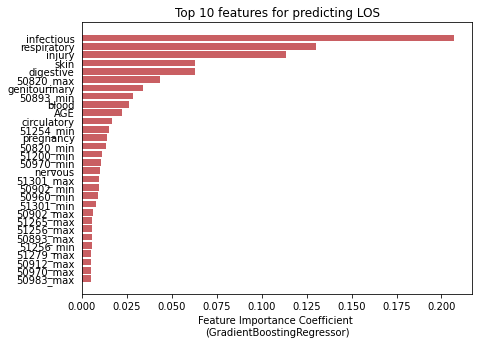

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
ind = range(0,30)
ax.barh(ind, feature_imp['importance'].values[0:30], 
        align='center', color='#c44e52', alpha=0.9)
ax.set_yticks(ind)
ax.set_yticklabels(feature_imp.index[0:30].tolist())
ax.tick_params(left=False, top=False, right=False) 
ax.set_title("Top 10 features for predicting LOS")
ax.set_xlabel('Feature Importance Coefficient \n(GradientBoostingRegressor)')
plt.gca().invert_yaxis()
#fig.savefig('images/feature_importance.png', bbox_inches = 'tight')

In [ ]:
X_feature = X.loc[:, feature_imp.index[0:10].tolist()]

In [ ]:
X_feature

infectious  respiratory  injury  ...  50893_min  blood   AGE
0            0.0          0.0     1.0  ...   9.000000    0.0  90.0
1            0.0          2.0     1.0  ...   8.215603    0.0  72.0
2            0.0          2.0     0.0  ...   7.800000    0.0  45.0
3            1.0          7.0     2.0  ...   8.215603    1.0  56.0
4            0.0          2.0     1.0  ...   8.300000    1.0  71.0
...          ...          ...     ...  ...        ...    ...   ...
8901         1.0          1.0     2.0  ...   9.000000    1.0  77.0
8902         0.0          1.0     0.0  ...   8.200000    0.0  53.0
8903         0.0          0.0     4.0  ...   8.800000    0.0  85.0
8904         0.0          0.0     3.0  ...   8.215603    0.0  78.0
8905         1.0          1.0     2.0  ...   7.300000    0.0  88.0

[8906 rows x 10 columns]

In [ ]:
X_train, X_test, y_train, y_test = stad_z(X_feature, y)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

7124
1782


In [ ]:
# 모델 생성
reg_model = GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)
reg_model.fit(X_train, y_train)
# 예측
y_pred = reg_model.predict(X_test)
# 평가
r2 = r2_score(y_test, y_pred)
print("Optimized R2 score is: {:2f}".format(r2))

Optimized R2 score is: 0.242112


## RandomForestRegressor_MDI



In [ ]:
X

AGE  blood  circulatory  ...  51275_max_i  51279_max_i  51301_max_i
0     90.0    0.0          6.0  ...          0.0          0.0          0.0
1     72.0    0.0          2.0  ...          1.0          1.0          1.0
2     45.0    0.0          3.0  ...          0.0          0.0          0.0
3     56.0    1.0          1.0  ...          1.0          1.0          1.0
4     71.0    1.0          1.0  ...          0.0          0.0          0.0
...    ...    ...          ...  ...          ...          ...          ...
8901  77.0    1.0          4.0  ...          1.0          0.0          0.0
8902  53.0    0.0          0.0  ...          1.0          0.0          0.0
8903  85.0    0.0          3.0  ...          1.0          0.0          0.0
8904  78.0    0.0          1.0  ...          0.0          0.0          0.0
8905  88.0    0.0          1.0  ...          0.0          0.0          0.0

[8906 rows x 144 columns]

In [ ]:
y

0        5.013889
1        7.647917
2       19.197917
3       27.218750
4        7.795139
          ...    
8901    19.440278
8902     6.676389
8903     1.940972
8904     4.145833
8905     0.662500
Name: stay, Length: 8906, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = stad_z(X, y)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

7124
1782


In [ ]:
# 모델 생성
reg_model = RandomForestRegressor(max_depth=18, n_estimators=1000, random_state=0)
reg_model.fit(X_train, y_train)
# 예측
y_pred = reg_model.predict(X_test)
# 평가
r2 = r2_score(y_test, y_pred)
print("Optimized R2 score is: {:2f}".format(r2))

Optimized R2 score is: 0.221970


In [ ]:
features = df_final_clean.drop(['SUBJECT_ID','HOSPITAL_EXPIRE_FLAG','stay'], axis=1).columns.values
feature_imp = pd.DataFrame(reg_model.feature_importances_,
                                   index = features,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_imp.head(30)

importance
infectious       0.088996
respiratory      0.061080
injury           0.048853
digestive        0.029796
50820_max        0.026463
50931_min        0.024937
AGE              0.024078
50893_max        0.022621
50820_min        0.022034
51301_max        0.020434
51275_min        0.019808
skin             0.019373
50893_min        0.019045
51275_max        0.018724
circulatory      0.016923
51301_min        0.016362
genitourinary    0.015310
51265_max        0.014104
50970_min        0.014059
50971_max        0.013522
50983_min        0.013232
50931_max        0.013211
51265_min        0.013070
50912_max        0.012796
50960_min        0.012794
50912_min        0.012575
51006_max        0.012462
51279_max        0.012439
nervous          0.012408
50902_max        0.012395

In [ ]:
rfr_feature = feature_imp.index[0:30].tolist()
rfr_feature

['infectious',
 'respiratory',
 'injury',
 'digestive',
 '50820_max',
 '50931_min',
 'AGE',
 '50893_max',
 '50820_min',
 '51301_max',
 '51275_min',
 'skin',
 '50893_min',
 '51275_max',
 'circulatory',
 '51301_min',
 'genitourinary',
 '51265_max',
 '50970_min',
 '50971_max',
 '50983_min',
 '50931_max',
 '51265_min',
 '50912_max',
 '50960_min',
 '50912_min',
 '51006_max',
 '51279_max',
 'nervous',
 '50902_max']

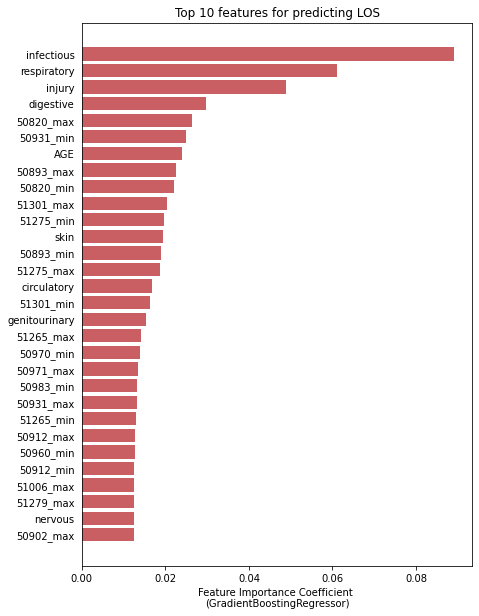

In [ ]:
fig, ax = plt.subplots(figsize=(7, 10))
ind = range(0,30)
ax.barh(ind, feature_imp['importance'].values[0:30], 
        align='center', color='#c44e52', alpha=0.9)
ax.set_yticks(ind)
ax.set_yticklabels(feature_imp.index[0:30].tolist())
ax.tick_params(left=False, top=False, right=False) 
ax.set_title("Top 10 features for predicting LOS")
ax.set_xlabel('Feature Importance Coefficient \n(GradientBoostingRegressor)')
plt.gca().invert_yaxis()
#fig.savefig('images/feature_importance.png', bbox_inches = 'tight')

### 예측모델

In [ ]:
X_feature = X.loc[:, feature_imp.index[0:30].tolist()]

In [ ]:
X_feature

infectious  respiratory  injury  ...  51279_max  nervous   50902_max
0            0.0          0.0     1.0  ...   3.110000      0.0   97.000000
1            0.0          2.0     1.0  ...   3.769634      2.0  105.747739
2            0.0          2.0     0.0  ...   3.520000      0.0  104.000000
3            1.0          7.0     2.0  ...   3.769634      1.0  105.747739
4            0.0          2.0     1.0  ...   3.100000      0.0  101.000000
...          ...          ...     ...  ...        ...      ...         ...
8901         1.0          1.0     2.0  ...   2.750000      2.0   96.000000
8902         0.0          1.0     0.0  ...   2.740000      0.0   84.000000
8903         0.0          0.0     4.0  ...   2.740000      0.0  103.000000
8904         0.0          0.0     3.0  ...   3.230000      1.0  115.000000
8905         1.0          1.0     2.0  ...   3.520000      2.0  109.000000

[8906 rows x 30 columns]

In [ ]:
X_train, X_test, y_train, y_test = stad_z(X_feature, y)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

7124
1782


In [ ]:
# 모델 생성
reg_model = RandomForestRegressor(max_depth=18, n_estimators=1000, random_state=0)
reg_model.fit(X_train, y_train)
# 예측
y_pred = reg_model.predict(X_test)
# 평가
r2 = r2_score(y_test, y_pred)
print("Optimized R2 score is: {:2f}".format(r2))

Optimized R2 score is: 0.215554


## LinearRegression_MDI -> 불가능

In [ ]:
X

AGE  blood  circulatory  ...  51275_max_i  51279_max_i  51301_max_i
0     90.0    0.0          6.0  ...          0.0          0.0          0.0
1     72.0    0.0          2.0  ...          1.0          1.0          1.0
2     45.0    0.0          3.0  ...          0.0          0.0          0.0
3     56.0    1.0          1.0  ...          1.0          1.0          1.0
4     71.0    1.0          1.0  ...          0.0          0.0          0.0
...    ...    ...          ...  ...          ...          ...          ...
8901  77.0    1.0          4.0  ...          1.0          0.0          0.0
8902  53.0    0.0          0.0  ...          1.0          0.0          0.0
8903  85.0    0.0          3.0  ...          1.0          0.0          0.0
8904  78.0    0.0          1.0  ...          0.0          0.0          0.0
8905  88.0    0.0          1.0  ...          0.0          0.0          0.0

[8906 rows x 144 columns]

In [ ]:
y

0        5.013889
1        7.647917
2       19.197917
3       27.218750
4        7.795139
          ...    
8901    19.440278
8902     6.676389
8903     1.940972
8904     4.145833
8905     0.662500
Name: stay, Length: 8906, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = stad_z(X, y)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

7124
1782


In [ ]:
# 모델 생성
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
# 예측
y_pred = reg_model.predict(X_test)
# 평가
r2 = r2_score(y_test, y_pred)
print("Optimized R2 score is: {:2f}".format(r2))

Optimized R2 score is: 0.235282


## MDI 교집합

In [ ]:
gbr_feature

array(['infectious', 'respiratory', 'injury', 'skin', 'digestive',
       '50820_max', 'genitourinary', '50893_min', 'blood', 'AGE',
       'circulatory', '51254_min', 'pregnancy', '50820_min', '51200_min',
       '50970_min', 'nervous', '51301_max', '50902_min', '50960_min',
       '51301_min', '50902_max', '51265_max', '51256_max', '50893_max',
       '51256_min', '51279_max', '50912_max', '50970_max', '50983_max'],
      dtype=object)

In [ ]:
rfr_feature

['infectious',
 'respiratory',
 'injury',
 'digestive',
 '50820_max',
 '50931_min',
 'AGE',
 '50893_max',
 '50820_min',
 '51301_max',
 '51275_min',
 'skin',
 '50893_min',
 '51275_max',
 'circulatory',
 '51301_min',
 'genitourinary',
 '51265_max',
 '50970_min',
 '50971_max',
 '50983_min',
 '50931_max',
 '51265_min',
 '50912_max',
 '50960_min',
 '50912_min',
 '51006_max',
 '51279_max',
 'nervous',
 '50902_max']

In [ ]:
union_feature = list(set(gbr_feature).union(set(rfr_feature)))
inter_feature = list(set(gbr_feature).intersection(set(rfr_feature)))

In [ ]:
X_feature = X.loc[:, inter_feature]

In [ ]:
X_feature

50970_min   51265_max   51301_min  ...  injury  50893_max  genitourinary
0      3.600000  211.000000   14.100000  ...     1.0   9.000000            1.0
1      3.606045  224.640747   12.124459  ...     1.0   8.409397            0.0
2      4.200000  265.000000   16.400000  ...     0.0   7.800000            0.0
3      3.606045  224.640747   12.124459  ...     2.0   8.409397            0.0
4      2.700000  199.000000   11.800000  ...     1.0   8.800000            0.0
...         ...         ...         ...  ...     ...        ...            ...
8901   3.600000  256.000000   12.200000  ...     2.0   9.000000            7.0
8902  13.200000  430.000000   13.200000  ...     0.0   8.200000            4.0
8903   3.000000  169.000000  325.700000  ...     4.0   8.800000            0.0
8904   3.606045  243.000000   13.000000  ...     3.0   8.409397            0.0
8905   1.600000  182.000000    5.600000  ...     2.0   8.400000            1.0

[8906 rows x 21 columns]

In [ ]:
X_train, X_test, y_train, y_test = stad_z(X_feature, y)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

7124
1782


In [ ]:
models = [GradientBoostingRegressor(random_state = 42, max_depth=2, n_estimators=200), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0, max_depth=18, n_estimators=1000),
          SVR()]

results_r2 = {}
results_MAE = {}
results_RMSE = {}

for model in models:
    
    # 모델 정의 및 모델 형성
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # 예측
    y_pred = reg_model.predict(X_test)
    
    # 모델 이름
    name = str(model).split("(")[0]

    results_r2[name] = r2_score(y_test, y_pred)
    results_MAE[name] = metrics.mean_absolute_error(y_test, y_pred)
    results_RMSE[name] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('{} done.'.format(name))

GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.


In [ ]:
results_r2

{'GradientBoostingRegressor': 0.23260690372217518,
 'KNeighborsRegressor': 0.12748029974774777,
 'LinearRegression': 0.21565477410420753,
 'RandomForestRegressor': 0.2211220483018118,
 'SVR': 0.10180694131882806}

In [ ]:
results_MAE

{'GradientBoostingRegressor': 5.95613272739844,
 'KNeighborsRegressor': 6.388776655443322,
 'LinearRegression': 6.0669070998617745,
 'RandomForestRegressor': 6.072015017804681,
 'SVR': 5.744619092557824}

In [ ]:
results_RMSE

{'GradientBoostingRegressor': 10.698727487091139,
 'KNeighborsRegressor': 11.40803388153613,
 'LinearRegression': 10.81625233140619,
 'RandomForestRegressor': 10.778489094735868,
 'SVR': 11.574654300628064}

# 전체 데이터 기준

In [ ]:
df_adm = pd.read_csv("/content/drive/Shareddrives/Multicampus/mimic-iii-clinical-database-1.4/ADMISSIONS.csv.gz")

In [ ]:
df_adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [ ]:
# 입원 및 퇴원 시간 datetime 형태로 변경
df_adm['ADMITTIME'] = pd.to_datetime(df_adm['ADMITTIME'])
df_adm['DISCHTIME'] = pd.to_datetime(df_adm['DISCHTIME'])

# 체류시간 계산(일단위)
df_adm['stay'] = (df_adm['DISCHTIME'] - df_adm['ADMITTIME']).dt.total_seconds() / 86400

In [ ]:
df_adm[['ADMITTIME','DISCHTIME','stay']].head()

ADMITTIME           DISCHTIME      stay
0 2196-04-09 12:26:00 2196-04-10 15:54:00  1.144444
1 2153-09-03 07:15:00 2153-09-08 19:10:00  5.496528
2 2157-10-18 19:34:00 2157-10-25 14:00:00  6.768056
3 2139-06-06 16:14:00 2139-06-09 12:48:00  2.856944
4 2160-11-02 02:06:00 2160-11-05 14:55:00  3.534028

In [ ]:
df_adm['stay'].describe()  #음수인 값 있음 => 이상치 처리 필요

count    58976.000000
mean        10.133916
std         12.456682
min         -0.945139
25%          3.743750
50%          6.467014
75%         11.795139
max        294.660417
Name: stay, dtype: float64

In [ ]:
df_adm[df_adm['stay'] < 0]  #98개 데이터

ROW_ID  SUBJECT_ID  ...  HAS_CHARTEVENTS_DATA      stay
425       534         417  ...                     1 -0.372917
456       237         181  ...                     1 -0.138889
692       644         516  ...                     0 -0.797222
1911     1640        1334  ...                     1 -0.113194
1970     1699        1381  ...                     1 -0.100694
...       ...         ...  ...                   ...       ...
57233   57980       96810  ...                     1 -0.359722
57559   58635       98943  ...                     1 -0.335417
57902   58720       99207  ...                     1 -0.332639
58346   55950       90642  ...                     1 -0.108333
58884   57477       95367  ...                     1 -0.094444

[98 rows x 20 columns]

In [ ]:
# 체류시간이 0보다 작은 값 drop
df_adm = df_adm[df_adm['stay'] > 0]

In [ ]:
# 이상치 유무 확인
df_adm['stay'].describe()

count    58878.000000
mean        10.151266
std         12.459774
min          0.001389
25%          3.755556
50%          6.489583
75%         11.805556
max        294.660417
Name: stay, dtype: float64

In [ ]:
df_dummy = pd.read_csv("/content/drive/Shareddrives/Multicampus/Preprocessing/0414_dummy(최종).csv")

In [ ]:
df_dummy

SUBJECT_ID  AGE  staytime  ... ETH_WHITE  GEN_F  GEN_M
0              22   64         2  ...         1      1      0
1              24   39         3  ...         1      0      1
2              25   58         4  ...         1      0      1
3              26   72         7  ...         0      0      1
4              28   74         6  ...         1      0      1
...           ...  ...       ...  ...       ...    ...    ...
30919       98794   78         5  ...         1      0      1
30920       98797   88         1  ...         1      0      1
30921       98800   19         3  ...         1      1      0
30922       98802   83         1  ...         1      1      0
30923       98805   42         9  ...         1      0      1

[30924 rows x 66 columns]

In [ ]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30924 entries, 0 to 30923
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   SUBJECT_ID                  30924 non-null  int64 
 1   AGE                         30924 non-null  int64 
 2   staytime                    30924 non-null  int64 
 3   new_code                    30924 non-null  object
 4   blood                       30924 non-null  int64 
 5   circulatory                 30924 non-null  int64 
 6   congenital                  30924 non-null  int64 
 7   digestive                   30924 non-null  int64 
 8   endocrine                   30924 non-null  int64 
 9   genitourinary               30924 non-null  int64 
 10  infectious                  30924 non-null  int64 
 11  injury                      30924 non-null  int64 
 12  mental                      30924 non-null  int64 
 13  misc                        30924 non-null  in

In [ ]:
df_dummy.drop(['staytime','new_code','AGEG1','AGEG2'], axis=1, inplace=True)

In [ ]:
df_clean = pd.merge(df_adm[['SUBJECT_ID','stay']], df_dummy, 
                    on='SUBJECT_ID', how='inner')

In [ ]:
df_clean

SUBJECT_ID      stay  AGE  ...  ETH_WHITE  GEN_F  GEN_M
0              22  1.144444   64  ...          1      1      0
1              24  2.856944   39  ...          1      0      1
2              25  3.534028   58  ...          1      0      1
3              26  6.988889   72  ...          0      0      1
4              28  5.364583   74  ...          1      0      1
...           ...       ...  ...  ...        ...    ...    ...
30858       98794  4.145833   78  ...          1      0      1
30859       98797  0.662500   88  ...          1      0      1
30860       98800  2.742361   19  ...          1      1      0
30861       98802  0.548611   83  ...          1      1      0
30862       98805  8.203472   42  ...          1      0      1

[30863 rows x 63 columns]

In [ ]:
df_clean['SUBJECT_ID'].nunique()

30863

In [ ]:
pivot12 = pd.read_csv(path+"pivot12_mnmx.csv")

In [ ]:
pivot12

SUBJECT_ID  50820_min  50868_min  ...  51275_max  51279_max  51301_max
0               2        NaN        NaN  ...        NaN       4.81       22.0
1               3       7.26       19.0  ...       58.3       3.30       24.4
2               4        NaN       15.0  ...       33.2       3.42        9.7
3               5        NaN        NaN  ...        NaN       3.96       13.9
4               6       7.25       23.0  ...      139.0       3.44       10.6
...           ...        ...        ...  ...        ...        ...        ...
33581       99983        NaN       11.0  ...       27.0       4.21        7.5
33582       99991        NaN        NaN  ...        NaN        NaN        NaN
33583       99992        NaN       15.0  ...        NaN       3.43       17.1
33584       99995       7.37        8.0  ...       35.5       2.86        8.2
33585       99999       7.36        NaN  ...        NaN        NaN        NaN

[33586 rows x 43 columns]

In [ ]:
df_final = pd.merge(df_clean, pivot12, 
                    on='SUBJECT_ID', how='inner')

In [ ]:
df_final

SUBJECT_ID       stay  AGE  ...  51275_max  51279_max  51301_max
0              22   1.144444   64  ...        NaN        NaN        NaN
1              24   2.856944   39  ...       22.5       4.44        9.8
2              25   3.534028   58  ...       41.6       3.71       13.0
3              28   5.364583   74  ...       31.8        NaN        NaN
4              30   5.013889   90  ...       43.1       3.11       14.1
...           ...        ...  ...  ...        ...        ...        ...
27648       98769  10.794444   80  ...       31.1       3.53       11.7
27649       98794   4.145833   78  ...       32.8       3.23       13.0
27650       98797   0.662500   88  ...       35.1       3.52        8.0
27651       98800   2.742361   19  ...       28.7       3.15       15.1
27652       98805   8.203472   42  ...        NaN        NaN        NaN

[27653 rows x 105 columns]

In [ ]:
df_final['SUBJECT_ID'].nunique()

27653

In [ ]:
X, y = mean_z(df_final, 'stay')

In [ ]:
X

AGE  blood  circulatory  ...  51275_max  51279_max  51301_max
0      64.0    0.0          1.0  ...  40.914864   3.813965  12.194572
1      39.0    0.0          2.0  ...  22.500000   4.440000   9.800000
2      58.0    0.0          3.0  ...  41.600000   3.710000  13.000000
3      74.0    0.0          4.0  ...  31.800000   3.813965  12.194572
4      90.0    0.0          6.0  ...  43.100000   3.110000  14.100000
...     ...    ...          ...  ...        ...        ...        ...
27648  80.0    0.0          4.0  ...  31.100000   3.530000  11.700000
27649  78.0    0.0          1.0  ...  32.800000   3.230000  13.000000
27650  88.0    0.0          1.0  ...  35.100000   3.520000   8.000000
27651  19.0    1.0          0.0  ...  28.700000   3.150000  15.100000
27652  42.0    0.0          0.0  ...  40.914864   3.813965  12.194572

[27653 rows x 102 columns]

In [ ]:
y

0         1.144444
1         2.856944
2         3.534028
3         5.364583
4         5.013889
           ...    
27648    10.794444
27649     4.145833
27650     0.662500
27651     2.742361
27652     8.203472
Name: stay, Length: 27653, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = stad_z(X, y)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

22122
5531


In [ ]:
models = [GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0),
          SVR()]

# 이전과정에서 r2값이 음수였던 모델은 제외한 경우
# models = [GradientBoostingRegressor(random_state = 0), 
#           LinearRegression(),
#           KNeighborsRegressor(),
#           RandomForestRegressor(random_state = 0),
#           SVR()]

results_r2 = {}
results_MAE = {}
results_RMSE = {}

for model in models:
    
    # 모델 정의 및 모델 형성
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # 예측
    y_pred = reg_model.predict(X_test)
    
    # 모델 이름
    name = str(model).split("(")[0]

    results_r2[name] = r2_score(y_test, y_pred)
    results_MAE[name] = metrics.mean_absolute_error(y_test, y_pred)
    results_RMSE[name] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('{} done.'.format(name))

GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.


In [ ]:
results_r2

{'GradientBoostingRegressor': 0.21006588696572104,
 'KNeighborsRegressor': 0.041832895359170674,
 'LinearRegression': 0.2033281261629597,
 'RandomForestRegressor': 0.18438540149793925,
 'SVR': 0.13521324950761981}

In [ ]:
results_MAE

{'GradientBoostingRegressor': 5.236496519167177,
 'KNeighborsRegressor': 5.563810843930171,
 'LinearRegression': 5.347885971494551,
 'RandomForestRegressor': 5.418108340194014,
 'SVR': 4.908331364865773}

In [ ]:
results_RMSE

{'GradientBoostingRegressor': 8.854861339929913,
 'KNeighborsRegressor': 9.752297892465755,
 'LinearRegression': 8.892545024178768,
 'RandomForestRegressor': 8.997644407622625,
 'SVR': 9.264902298260804}

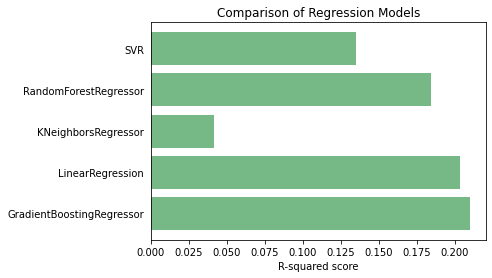

In [ ]:
# R2 score results
fig, ax = plt.subplots()
ind = range(len(results_r2))
ax.barh(ind, list(results_r2.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results_r2.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig(path+'totaldata_compare_models.png', bbox_inches = 'tight')

In [ ]:
tuned_parameters = [{'n_estimators': [100, 200, 300],
                     'max_depth' : [2, 3, 4]}]

# 모델 생성
reg_model = GradientBoostingRegressor(random_state=42)  
grid = GridSearchCV(reg_model, tuned_parameters)
grid.fit(X_train, y_train)
reg_model_optimized = grid.best_estimator_

# grid 결과 출력
print(grid.best_score_)
print(grid.best_estimator_)

KeyboardInterrupt: ignored

In [ ]:
y_test_preds = reg_model_optimized.predict(X_test)
r2_optimized = r2_score(y_test, y_test_preds)
print("Optimized R2 score is: {:2f}".format(r2_optimized))

# dummy 전체

In [ ]:
df_clean

SUBJECT_ID      stay  AGE  ...  ETH_WHITE  GEN_F  GEN_M
0              22  1.144444   64  ...          1      1      0
1              24  2.856944   39  ...          1      0      1
2              25  3.534028   58  ...          1      0      1
3              26  6.988889   72  ...          0      0      1
4              28  5.364583   74  ...          1      0      1
...           ...       ...  ...  ...        ...    ...    ...
30858       98794  4.145833   78  ...          1      0      1
30859       98797  0.662500   88  ...          1      0      1
30860       98800  2.742361   19  ...          1      1      0
30861       98802  0.548611   83  ...          1      1      0
30862       98805  8.203472   42  ...          1      0      1

[30863 rows x 63 columns]

In [ ]:
df_clean['SUBJECT_ID'].nunique()

30863

In [ ]:
from sklearn.impute import SimpleImputer
X, y = mean_z(df_clean, 'stay')

In [ ]:
X

AGE  blood  circulatory  ...  ETH_WHITE  GEN_F  GEN_M
0      64.0    0.0          1.0  ...        1.0    1.0    0.0
1      39.0    0.0          2.0  ...        1.0    0.0    1.0
2      58.0    0.0          3.0  ...        1.0    0.0    1.0
3      72.0    0.0          5.0  ...        0.0    0.0    1.0
4      74.0    0.0          4.0  ...        1.0    0.0    1.0
...     ...    ...          ...  ...        ...    ...    ...
30858  78.0    0.0          1.0  ...        1.0    0.0    1.0
30859  88.0    0.0          1.0  ...        1.0    0.0    1.0
30860  19.0    1.0          0.0  ...        1.0    1.0    0.0
30861  83.0    0.0          3.0  ...        1.0    1.0    0.0
30862  42.0    0.0          0.0  ...        1.0    0.0    1.0

[30863 rows x 60 columns]

In [ ]:
y

0        1.144444
1        2.856944
2        3.534028
3        6.988889
4        5.364583
           ...   
30858    4.145833
30859    0.662500
30860    2.742361
30861    0.548611
30862    8.203472
Name: stay, Length: 30863, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = stad_z(X, y)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

24690
6173


In [ ]:
models = [GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0),
          SVR()]

# 이전과정에서 r2값이 음수였던 모델은 제외한 경우
# models = [GradientBoostingRegressor(random_state = 0), 
#           LinearRegression(),
#           KNeighborsRegressor(),
#           RandomForestRegressor(random_state = 0),
#           SVR()]

results_r2 = {}
results_MAE = {}
results_RMSE = {}

for model in models:
    
    # 모델 정의 및 모델 형성
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # 예측
    y_pred = reg_model.predict(X_test)
    
    # 모델 이름
    name = str(model).split("(")[0]

    results_r2[name] = r2_score(y_test, y_pred)
    results_MAE[name] = metrics.mean_absolute_error(y_test, y_pred)
    results_RMSE[name] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('{} done.'.format(name))

GradientBoostingRegressor done.
LinearRegression done.


In [ ]:
results_r2

{'GradientBoostingRegressor': 0.26011657508275365,
 'KNeighborsRegressor': 0.07695795498340163,
 'LinearRegression': 0.24577577807822104,
 'RandomForestRegressor': 0.22263014210452226,
 'SVR': 0.17986931709016218}

In [ ]:
results_MAE

{'GradientBoostingRegressor': 5.0957581225246855,
 'KNeighborsRegressor': 5.589302360638625,
 'LinearRegression': 5.20608338712479,
 'RandomForestRegressor': 5.278083772126835,
 'SVR': 4.826085142660318}

In [ ]:
results_RMSE

{'GradientBoostingRegressor': 8.263569991822255,
 'KNeighborsRegressor': 9.229895896465985,
 'LinearRegression': 8.343270007801545,
 'RandomForestRegressor': 8.470321783948823,
 'SVR': 8.70016703668329}

In [ ]:
# R2 score results
fig, ax = plt.subplots()
ind = range(len(results_r2))
ax.barh(ind, list(results_r2.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results_r2.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig(path+'dummydata_compare_models.png', bbox_inches = 'tight')

In [ ]:
tuned_parameters = [{'max_depth' : [2, 3, 4],
                     'min_samples_split' : [10, 20]}]

# 모델 생성
reg_model = GradientBoostingRegressor(n_estimators=500, random_state=0)  
grid = GridSearchCV(reg_model, tuned_parameters)
grid.fit(X_train, y_train)
reg_model_optimized = grid.best_estimator_

# grid 결과 출력
print(grid.best_score_)
print(grid.best_estimator_)

0.23243865628753485
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
y_test_preds = reg_model_optimized.predict(X_test)
r2_optimized = r2_score(y_test, y_test_preds)
print("Optimized R2 score is: {:2f}".format(r2_optimized))

Optimized R2 score is: 0.250592


# 딥러닝

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
X_train

0         1         2   ...        57        58        59
0      0.048509 -0.612521  0.170746  ... -1.557510 -0.872961  0.872961
1      0.882976 -0.612521 -0.286738  ...  0.642051 -0.872961  0.872961
2     -0.118385 -0.612521  0.628229  ... -1.557510 -0.872961  0.872961
3      1.494919  0.846679 -0.744221  ... -1.557510  1.145526 -1.145526
4     -2.232368 -0.612521 -1.201704  ... -1.557510 -0.872961  0.872961
...         ...       ...       ...  ...       ...       ...       ...
24685  0.938607  2.305879  2.000679  ... -1.557510 -0.872961  0.872961
24686 -0.118385 -0.612521  0.170746  ...  0.642051 -0.872961  0.872961
24687  0.493558 -0.612521 -0.744221  ...  0.642051  1.145526 -1.145526
24688 -1.620425 -0.612521 -1.201704  ...  0.642051 -0.872961  0.872961
24689  0.437927 -0.612521 -0.744221  ...  0.642051  1.145526 -1.145526

[24690 rows x 60 columns]

In [ ]:
len(X_train.columns)

60

In [ ]:
# 다중선형회귀
model = Sequential()

# 입력 x의 차원은 60, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=60, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.00001.
sgd = optimizers.SGD(lr=0.00001)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer = sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X_train,y_train, batch_size=1, epochs=100, shuffle=False)

Epoch 1/100
24690/24690 [==============================] - 20s 794us/step - loss: 168.1454 - mse: 168.1454
Epoch 2/100
24690/24690 [==============================] - 20s 795us/step - loss: 111.6231 - mse: 111.6231
Epoch 3/100
24690/24690 [==============================] - 19s 786us/step - loss: 92.3901 - mse: 92.3901
Epoch 4/100
24690/24690 [==============================] - 20s 795us/step - loss: 85.3346 - mse: 85.3346
Epoch 5/100
24690/24690 [==============================] - 20s 802us/step - loss: 82.6750 - mse: 82.6750
Epoch 6/100
24690/24690 [==============================] - 20s 794us/step - loss: 81.6516 - mse: 81.6516
Epoch 7/100
24690/24690 [==============================] - 20s 795us/step - loss: 81.2483 - mse: 81.2483
Epoch 8/100
24690/24690 [==============================] - 20s 799us/step - loss: 81.0839 - mse: 81.0839
Epoch 9/100
24690/24690 [==============================] - 20s 798us/step - loss: 81.0136 - mse: 81.0136
Epoch 10/100
24690/24690 [=========================

KeyboardInterrupt: ignored

mae = 80.9432에서 더이상 좋아지지 않음

In [ ]:
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))

## DNN

In [ ]:
model = Sequential()

model.add(Dense(units=35, activation='relu', input_dim=60))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [ ]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [ ]:
model.fit(X_train, y_train, epochs=500, batch_size=10000, validation_split = 0.2)

Epoch 1/300
2/2 [==============================] - 1s 489ms/step - loss: 9.3416 - mae: 9.3416 - val_loss: 9.4014 - val_mae: 9.4014
Epoch 2/300
2/2 [==============================] - 0s 63ms/step - loss: 9.1321 - mae: 9.1321 - val_loss: 9.2420 - val_mae: 9.2420
Epoch 3/300
2/2 [==============================] - 0s 65ms/step - loss: 9.0616 - mae: 9.0616 - val_loss: 9.0794 - val_mae: 9.0794
Epoch 4/300
2/2 [==============================] - 0s 65ms/step - loss: 8.8309 - mae: 8.8309 - val_loss: 8.9123 - val_mae: 8.9123
Epoch 5/300
2/2 [==============================] - 0s 63ms/step - loss: 8.7065 - mae: 8.7065 - val_loss: 8.7403 - val_mae: 8.7403
Epoch 6/300
2/2 [==============================] - 0s 63ms/step - loss: 8.5349 - mae: 8.5349 - val_loss: 8.5635 - val_mae: 8.5635
Epoch 7/300
2/2 [==============================] - 0s 61ms/step - loss: 8.3473 - mae: 8.3473 - val_loss: 8.3801 - val_mae: 8.3801
Epoch 8/300
2/2 [==============================] - 0s 72ms/step - loss: 8.1219 - mae: 8.1

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(r2_score(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.22486418144021736
4.843172384815987
8.458141837113942


# Cross Variation

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

In [ ]:
def create_model():
    # create model 
    model = Sequential() 
    model.add(Dense(30, input_dim=60, activation='relu')) 
    model.add(Dense(30, activation='relu')) 
    model.add(Dense(1, activation='sigmoid')) 
    # Compile model 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

In [ ]:
# fix random seed for reproducibility 
seed = 7 
np.random.seed(seed)

# create model 
model = KerasRegressor(build_fn=create_model, epochs=300, batch_size=1000, verbose=0)   

kfold = KFold(n_splits=5, shuffle=True, random_state=seed) 
results = cross_val_score(model, X, y, cv=kfold)

In [ ]:
results

array([2.08451600e+08, 1.66297088e+08, 2.97716736e+08, 2.46455584e+08,
       3.05032576e+08])

In [ ]:
results.mean()

244790716.8

In [ ]:
# fix random seed for reproducibility 
seed = 7 
np.random.seed(seed)

# create model 
model = GradientBoostingRegressor(random_state=0)   

kfold = KFold(n_splits=5, shuffle=True, random_state=seed) 
results = cross_val_score(model, X, y, cv=kfold)

In [ ]:
print(results)
print(results.mean())

[0.24149705 0.22956684 0.23873562 0.22528009 0.2422421 ]
0.23546433934521005


# 남정님 시각화 파일 만들어 드리기

In [ ]:
path = "/content/drive/Shareddrives/Multicampus/Preprocessing/"

In [ ]:
# results = {'KNN' : 0.7321, 'MICE' : 0.7289, 'Mean' : 0.7347}
# results = {'inter' : 0.7172, 'union' : 0.7236}
results = {'before_select':0.7229, 'LR': 0.7300, 'RF': 0.7282}

In [ ]:
# f1 score results
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_xlim(0.6, 0.75)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Classifier Models')
fig.savefig(path+'NJ_compare_models3.png', bbox_inches = 'tight')